<a href="https://colab.research.google.com/github/Rohith715/Machine-Learning/blob/main/Titanic_Prediction%5B1%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('train.csv')
print(df.columns)
df.head(5)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#start with splitting names
# i also gotta split the names in the test dataset as well.
from sklearn.impute import SimpleImputer
def namefix(d):
  si=SimpleImputer(missing_values=np.nan,strategy="mean")
  d=pd.DataFrame(d)
  x=0
  g1=[]
  g2=[]
  d.insert(loc=2, column='First_name', value='Unknown')
  d.insert(loc=3,column="Second_name", value="Unknown")
  while x<len(d["Name"]) :
    a=(d["Name"][x]).split(",")
    g1.append(a[0])
    g2.append(a[1])
    x=x+1
  d["First_name"]=g1
  d["Second_name"]=g2
  #after this part the code is responsible for salutations
  d.insert(loc=2,column="salutation",value="Unknown")
  x=0
  g3=[]
  g4=[]
  while x<len(d["Second_name"]):
    a=d["Second_name"][x]
    f=a.split(".")
    g3.append(f[0])
    g4.append(f[1])
    x=x+1
  d["salutation"]=g3
  d["Second_name"]=g4

  #after this part the code is responsible for the special family name
  d.insert(loc=5,column="family_name",value="Unknown")
  hh=[]
  hee=[]
  for x in d["Second_name"]:
    if "(" in x:
      x=x.replace(")","")
      a=x.split("(")
      hh.append(a[1])
      l1=x.find("(")
      hee.append(x[:l1])
    else:
      hh.append("none")
      hee.append(x)
  d["family_name"]=hh
  d["Second_name"]=hee
  d.drop(["Name"],axis=1,inplace=True)
  #d["Age"]=si.fit_transform(d[["Age"]]) ---removing the simple imputation[mean]
  return d
df=namefix(df)
df.head(5)


,PassengerId,Survived,salutation,First_name,Second_name,family_name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,Mr,Braund,Owen Harris,none,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,Mrs,Cumings,John Bradley,Florence Briggs Thayer,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,Miss,Heikkinen,Laina,none,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,Mrs,Futrelle,Jacques Heath,Lily May Peel,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,Mr,Allen,William Henry,none,3,male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#now we split the ticket as well
def Ticket_splitter(saa):
  saa=pd.DataFrame(saa)
  i=0
  g1=[]
  g2=[]
  for x in saa["Ticket"]:
    x=x.strip()
    if x.isnumeric():
      g1.append(x)
      g2.append("none")
    elif " " in x or "." in x:
      if x.rfind(".")>0:
        a=x.rsplit(".",1)
        g1.append(a[1])
        g2.append(a[0])
      elif " " in x:
        a=x.rsplit(" ",1)
        g1.append(a[1])
        g2.append(a[0])
    else:
      g1.append(x)
      g2.append("none")
  saa.insert(loc=6,column="Ticket_number",value="none")
  saa.insert(loc=7,column="Ticket_type",value="none")
  saa["Ticket_type"]=g2
  saa["Ticket_number"]=g1
  saa.drop(["Ticket"],axis=1,inplace=True)
  return saa
hf=Ticket_splitter(df)
hfc1=hf.copy()
hf.head(5)

,PassengerId,Survived,salutation,First_name,Second_name,family_name,Ticket_number,Ticket_type,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,Mr,Braund,Owen Harris,none,21171,A/5,3,male,22.0,1,0,7.2500,NaN,S
1,2,1,Mrs,Cumings,John Bradley,Florence Briggs Thayer,17599,PC,1,female,38.0,1,0,71.2833,C85,C
2,3,1,Miss,Heikkinen,Laina,none,3101282,STON/O2,3,female,26.0,0,0,7.9250,NaN,S
3,4,1,Mrs,Futrelle,Jacques Heath,Lily May Peel,113803,none,1,female,35.0,1,0,53.1000,C123,S
4,5,0,Mr,Allen,William Henry,none,373450,none,3,male,35.0,0,0,8.0500,NaN,S


In [ ]:
hf.isnull().sum()

,0
PassengerId,0
Survived,0
salutation,0
First_name,0
Second_name,0
family_name,0
Ticket_number,0
Ticket_type,0
Pclass,0
Sex,0


In [ ]:
#to continue with correlation we need to encode the dataframe
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
def endocerrr(df):
  aa=df.columns
  for x in aa:
    if df[x].dtype==object:
      df[x]=le.fit_transform(df[x])
  return df
hf=endocerrr(hf)
hf.head(5)

,PassengerId,Survived,salutation,First_name,Second_name,family_name,Ticket_number,Ticket_type,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,11,73,577,143,224,3,3,1,22.0,1,0,7.2500,147,2
1,2,1,12,136,401,73,193,13,1,0,38.0,1,0,71.2833,81,0
2,3,1,8,251,462,143,35,33,3,0,26.0,0,0,7.9250,147,2
3,4,1,12,198,362,101,128,39,1,0,35.0,1,0,53.1000,55,2
4,5,0,11,11,755,143,620,39,3,1,35.0,0,0,8.0500,147,2


In [ ]:
hf["Cabin"]=hf["Cabin"].replace(147, np.nan)
hf.isnull().sum()

,0
PassengerId,0
Survived,0
salutation,0
First_name,0
Second_name,0
family_name,0
Ticket_number,0
Ticket_type,0
Pclass,0
Sex,0


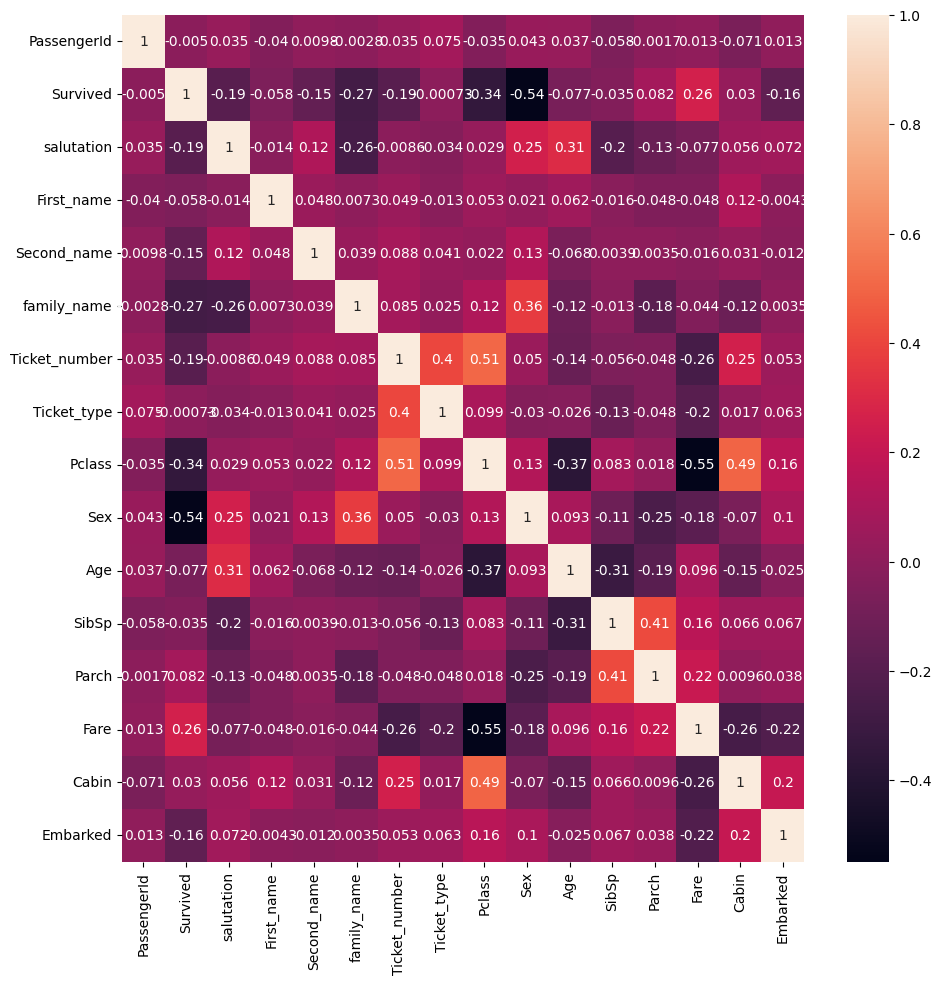

Index(['PassengerId', 'Survived', 'salutation', 'First_name', 'Second_name',
       'family_name', 'Ticket_number', 'Ticket_type', 'Pclass', 'Sex', 'Age',
       'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
#from the above we acknowledg that the age values are missing so we use knnimputer from sklearn to impute these values using the most corelated features to age;
import seaborn as sns
plt.figure(figsize=(11,11))
sns.heatmap(hf.corr(),annot=True)
plt.show()
hf.columns

In [ ]:
#create a dataframe that has only features that have high corelation wrt age and applied imputation
def impuvals(hf):
  d=hf[["salutation","Pclass","SibSp","Parch","Age"]]
  from sklearn.impute import KNNImputer
  knn=KNNImputer(n_neighbors=4)
  a=knn.fit_transform(d)
  a=pd.DataFrame(a,columns=d.columns)
  #a.isnull().sum()
  #create another dataset for cabin corelated features and impute
  d2=hf[["Ticket_number","Pclass","Fare","Embarked","Cabin"]]
  knn2=KNNImputer(n_neighbors=4)
  b=knn2.fit_transform(d2)
  b=pd.DataFrame(b,columns=d2.columns)
  hf["Age"]=a["Age"]
  hf["Cabin"]=b["Cabin"]
  return hf
hf=impuvals(hf)
#--------------
#b.isnull().sum()
hf.isnull().sum()

,0
PassengerId,0
Survived,0
salutation,0
First_name,0
Second_name,0
family_name,0
Ticket_number,0
Ticket_type,0
Pclass,0
Sex,0


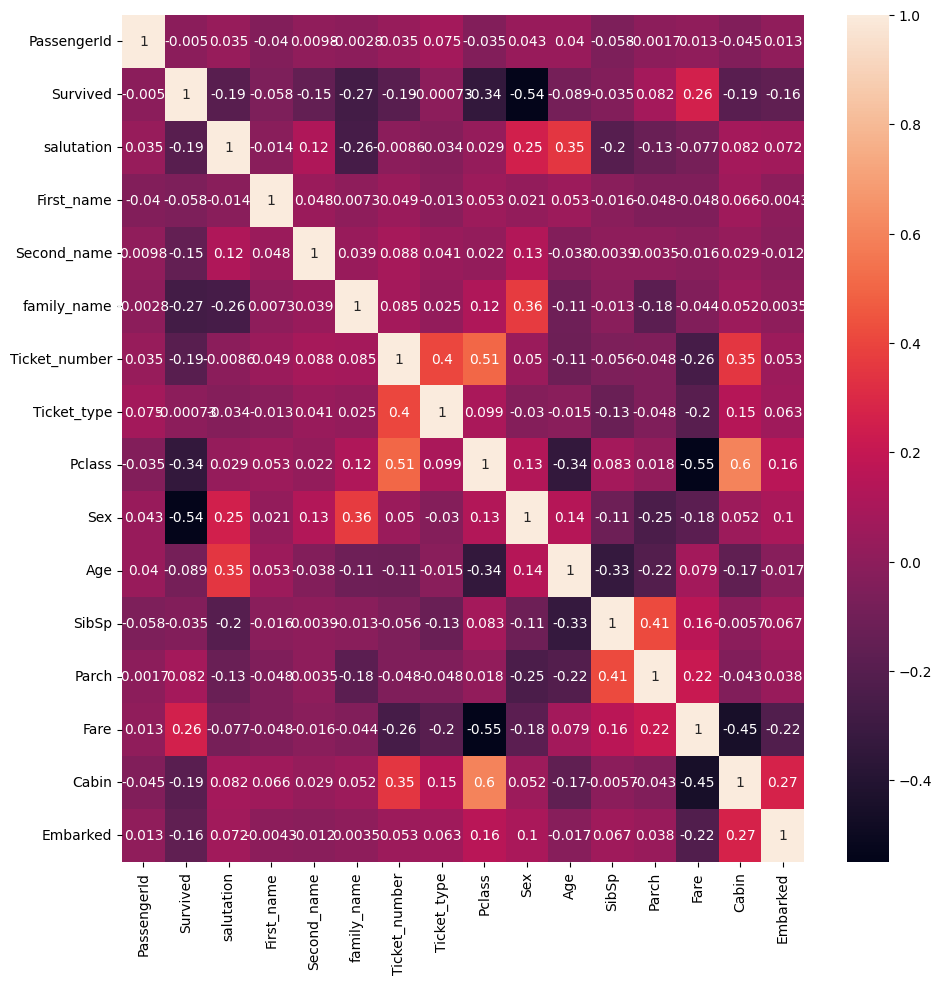

In [ ]:
plt.figure(figsize=(11,11))
sns.heatmap(hf.corr(),annot=True)
plt.show()

In [ ]:
hf.shape

(891, 16)

In [ ]:
hfc1["Ticket_type"].value_counts()
hfc1["Ticket_number"].value_counts()

,count
Ticket_number,
1601,7
347082,7
2343,7
3101295,6
2144,6
...,...
9234,1
19988,1
2693,1


In [ ]:
#all right then here we go splitting and predicting
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import xgboost as xbg
from sklearn.metrics import accuracy_score,f1_score
x=hf.drop(["Survived"],axis=1)
y=hf["Survived"]
xtrain,ytrain,xtest,ytest=train_test_split(x,y,test_size=0.2)

In [ ]:
#this is using randomforest , i should have probably used grid search, for now i have just manually checked it for a range of 20;
model1=RandomForestClassifier(n_estimators=100,random_state=5)
model1.fit(xtrain,xtest)
ypred=model1.predict(ytrain)
print(accuracy_score(ytest,ypred))

0.8491620111731844


In [ ]:
#using logistic regression
from sklearn.linear_model import LogisticRegression
model3=LogisticRegression(max_iter=10000)
model3.fit(xtrain,xtest)
ypred=model3.predict(ytrain)
print(accuracy_score(ytest,ypred))


0.7653631284916201


In [ ]:
from sklearn.metrics import recall_score
modelg1=RandomForestClassifier(max_depth= None,min_samples_leaf= 2, min_samples_split= 2, n_estimators= 100)
modelg1.fit(xtrain,xtest)
ypred=modelg1.predict(ytrain)
print(accuracy_score(ytest,ypred))
print(f1_score(ytest,ypred))
print(recall_score(ytest,ypred))

0.8324022346368715
0.7619047619047619
0.7384615384615385


In [ ]:
import xgboost as xgb
model2=xgb.XGBClassifier(n_estimators=100)
model2.fit(xtrain,xtest)
ypred=model2.predict(ytrain)
print(accuracy_score(ytest,ypred))
print(f1_score(ytest,ypred))
print(recall_score(ytest,ypred))

0.8379888268156425
0.7751937984496124
0.7692307692307693


In [ ]:
#now for the final dataset processing
dff=pd.read_csv("test.csv")
dff=namefix(dff)
dff=Ticket_splitter(dff)
dff=endocerrr(dff)
dff=impuvals(dff)
from sklearn.impute import SimpleImputer
si=SimpleImputer(strategy="mean")
dff["Fare"]=si.fit_transform(dff[["Fare"]])
dff.shape

(418, 15)

In [ ]:
from sklearn.svm import SVC
model = SVC(kernel="rbf")
model.fit(xtrain, xtest)
ypred = model.predict(ytrain)
accuracy = accuracy_score(ytest, ypred)
f1 = f1_score(ytest, ypred)
recall = recall_score(ytest, ypred)
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Recall Score:", recall)

Accuracy: 0.6424581005586593
F1 Score: 0.37254901960784315
Recall Score: 0.2923076923076923


In [ ]:
#les simply try neural networks
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(xtrain.shape[1],)), # Adjust input shape
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid') # Output layer for binary classification
   ])
model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])
model.fit(xtrain, xtest, epochs=10, batch_size=32) # Adjust epochs and batch size
loss, accuracy = model.evaluate(ytrain, ytest, verbose=0)
print("Accuracy:", accuracy)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5508 - loss: 13.2799
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5844 - loss: 3.9436
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6270 - loss: 2.2442
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6636 - loss: 1.5855
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6321 - loss: 1.5037
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6397 - loss: 1.2213
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6528 - loss: 1.1031
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6773 - loss: 1.2434
Epoch 9/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6460 - loss: 1.2549
Epoch 10/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6878 - loss: 1.0132
Accuracy: 0.6033519506454468


In [ ]:
xtrain.head(5)

,PassengerId,salutation,First_name,Second_name,family_name,Ticket_number,Ticket_type,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
159,160,7,532,694,143,19,8,3,1,9.25,8,2,69.5500,109.50,2
325,326,8,654,514,143,210,13,1,0,36.00,0,0,135.6333,65.00,0
501,502,8,92,524,143,581,39,3,0,21.00,0,0,7.7500,119.25,1
519,520,11,472,673,143,526,39,3,1,32.00,0,0,7.8958,141.00,2
571,572,12,21,167,44,139,39,1,0,53.00,2,0,51.4792,48.00,2


In [ ]:
dff.head(20)

,PassengerId,Pclass,salutation,First_name,Second_name,family_name,Ticket_number,Ticket_type,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,892,3,5,172,181,78,245,32,1,34.5,0,0,7.8292,76.0,1
1,893,3,6,339,182,29,314,32,0,47.0,1,0,7.0000,76.0,2
2,894,2,5,231,333,78,159,32,1,62.0,0,0,9.6875,76.0,1
3,895,3,5,344,9,78,240,32,1,27.0,0,0,8.6625,76.0,2
4,896,3,6,150,13,40,228,32,0,22.0,1,1,12.2875,76.0,2
5,897,3,5,312,194,78,358,32,1,14.0,0,0,9.2250,76.0,2
6,898,3,4,73,233,78,251,32,0,30.0,0,0,7.6292,76.0,1
7,899,2,5,48,11,78,170,32,1,26.0,1,1,29.0000,76.0,2
8,900,3,6,3,220,72,186,32,0,18.0,0,0,7.2292,76.0,0
9,901,3,5,90,215,78,352,3,1,21.0,2,0,24.1500,76.0,2


In [ ]:
#ok hey i have figured out something ,mm what if i jus combine the train and test datasets to make a big data set and train my model on that
#like the test dataset either way dosent have a prediction so i can encode and impute them together therby making it comfortable for my model to predict
#well i am going to try it now, maby i should do it after i complete the previous attempt to just test the model.

In [ ]:
print(len(dff)+len(hf))

1309


In [ ]:
hf.columns

Index(['PassengerId', 'Survived', 'salutation', 'First_name', 'Second_name',
       'family_name', 'Ticket_number', 'Ticket_type', 'Pclass', 'Sex', 'Age',
       'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
xtrain=hf.drop(["Survived"],axis=1)
ytrain=hf["Survived"]
xtest=dff[['PassengerId', 'salutation', 'First_name', 'Second_name',
       'family_name', 'Ticket_number', 'Ticket_type', 'Pclass', 'Sex', 'Age',
       'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked']]
xtest.head(3)

,PassengerId,salutation,First_name,Second_name,family_name,Ticket_number,Ticket_type,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,892,5,172,181,78,245,32,3,1,34.5,0,0,7.8292,76.0,1
1,893,6,339,182,29,314,32,3,0,47.0,1,0,7.0000,76.0,2
2,894,5,231,333,78,159,32,2,1,62.0,0,0,9.6875,76.0,1


In [ ]:
#alright les export it
modelff=RandomForestClassifier(max_depth= None,min_samples_leaf= 2, min_samples_split= 2, n_estimators= 100)
modelff.fit(xtrain,ytrain)
out=modelff.predict(xtest)
pd.DataFrame({"PassengerId":dff["PassengerId"],"Survived":out}).to_csv("submission11.csv",index=False)